Aufgabe 2

Laden der Daten

In [44]:
import os
import pandas as pd 
import matplotlib.pyplot as plt 

ordnerName = 'Datensätze'
dateiNamen = [
    'mpi_roof_2014a.csv',
    'mpi_roof_2014b.csv',
    'mpi_roof_2015a.csv',
    'mpi_roof_2015b.csv',
    'mpi_roof_2016a.csv',
    'mpi_roof_2016b.csv'
]

datensatzArray = []

for datensatzName in dateiNamen:
    pfadName = os.path.join(ordnerName, datensatzName)
    print(f"Lade Datei: {pfadName}")
    datensatzArray.append(pd.read_csv(pfadName, encoding='ISO-8859-1'))
    
datensatz = pd.concat(datensatzArray, ignore_index = True)
print("Datensätze erfolgreich zusammengefügt")
display(datensatz)

Lade Datei: Datensätze/mpi_roof_2014a.csv
Lade Datei: Datensätze/mpi_roof_2014b.csv
Lade Datei: Datensätze/mpi_roof_2015a.csv
Lade Datei: Datensätze/mpi_roof_2015b.csv
Lade Datei: Datensätze/mpi_roof_2016a.csv
Lade Datei: Datensätze/mpi_roof_2016b.csv
Datensätze erfolgreich zusammengefügt


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2014 00:10:00,987.54,-0.11,274.03,-4.33,73.10,6.06,4.43,1.63,2.79,...,2.25,3.91,204.6,0.0,0.0,0.0,0.0,0.0,10.36,413.5
1,01.01.2014 00:20:00,987.39,-0.07,274.08,-4.38,72.60,6.08,4.41,1.66,2.78,...,2.31,3.16,199.4,0.0,0.0,0.0,0.0,0.0,10.32,413.6
2,01.01.2014 00:30:00,987.18,-0.07,274.10,-4.34,72.80,6.08,4.42,1.65,2.79,...,2.58,3.67,190.5,0.0,0.0,0.0,0.0,0.0,10.31,414.1
3,01.01.2014 00:40:00,987.18,0.20,274.37,-4.29,71.70,6.20,4.44,1.75,2.80,...,2.59,4.13,178.9,0.0,0.0,0.0,0.0,0.0,10.31,413.3
4,01.01.2014 00:50:00,986.97,0.43,274.62,-4.29,70.50,6.30,4.44,1.86,2.80,...,3.65,5.69,173.7,0.0,0.0,0.0,0.0,0.0,10.33,412.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157461,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,...,0.67,1.52,240.0,0.0,0.0,0.0,0.0,0.0,7.37,429.8
157462,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,...,1.14,1.92,234.3,0.0,0.0,0.0,0.0,0.0,7.29,428.7
157463,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,...,1.08,2.00,215.2,0.0,0.0,0.0,0.0,0.0,7.21,428.6
157464,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,...,1.49,2.16,225.8,0.0,0.0,0.0,0.0,0.0,7.14,430.0


Reduktion der Messfrequenz

In [45]:
datensatz['Date Time'] = pd.to_datetime(datensatz['Date Time'], format='%d.%m.%Y %H:%M:%S')

datensatz.set_index('Date Time', inplace = True)

datensatzStündlich = datensatz.resample('h').mean()

display(datensatzStündlich)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
Date Time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,987.252000,0.076000,274.240000,-4.326000,72.140000,6.144000,4.428000,1.710000,2.792000,4.486000,...,2.676000,4.112000,189.420000,0.0,0.0,0.0,0.0,0.0,10.326000,413.440000
2014-01-01 01:00:00,986.775000,0.968333,275.173333,-4.453333,66.945000,6.553333,4.386667,2.168333,2.771667,4.445000,...,3.046667,4.695000,186.400000,0.0,0.0,0.0,0.0,0.0,10.598333,411.500000
2014-01-01 02:00:00,986.448333,1.430000,275.661667,-4.453333,64.758333,6.778333,4.388333,2.390000,2.770000,4.448333,...,2.630000,3.643333,190.350000,0.0,0.0,0.0,0.0,0.0,11.318333,411.083333
2014-01-01 03:00:00,986.171667,2.125000,276.380000,-4.361667,62.033333,7.120000,4.416667,2.703333,2.788333,4.478333,...,1.825000,3.118333,196.150000,0.0,0.0,0.0,0.0,0.0,11.996667,410.683333
2014-01-01 04:00:00,986.251667,2.771667,277.025000,-4.586667,58.221667,7.460000,4.341667,3.118333,2.741667,4.401667,...,0.908333,1.550000,227.016667,0.0,0.0,0.0,0.0,0.0,12.791667,410.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 20:00:00,1001.410000,-2.503333,270.546667,-7.025000,71.080000,5.086667,3.601667,1.485000,2.240000,3.596667,...,0.923333,1.526667,203.533333,0.0,0.0,0.0,0.0,0.0,9.585000,431.000000
2016-12-31 21:00:00,1001.063333,-2.653333,270.426667,-6.970000,72.016667,5.025000,3.616667,1.406667,2.248333,3.611667,...,0.573333,1.250000,98.366667,0.0,0.0,0.0,0.0,0.0,8.631667,430.250000
2016-12-31 22:00:00,1000.511667,-3.553333,269.568333,-7.348333,74.916667,4.698333,3.515000,1.188333,2.188333,3.513333,...,0.816667,1.410000,167.958333,0.0,0.0,0.0,0.0,0.0,7.885000,434.000000


Daten visualisieren

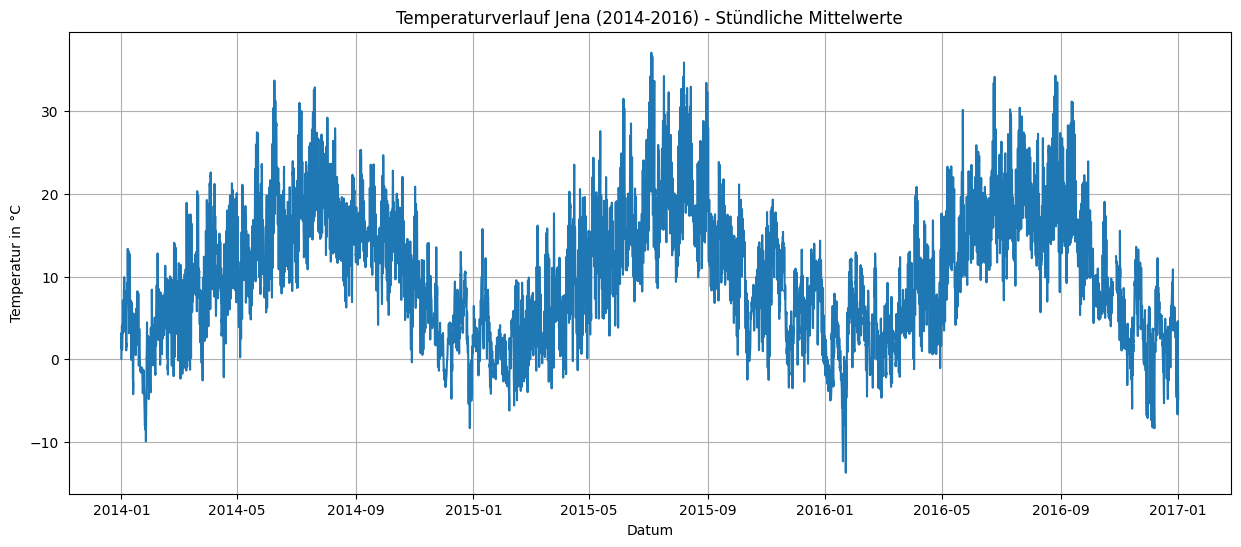

In [46]:
plt.figure(figsize = (15, 6))

plt.plot(datensatzStündlich.index, datensatzStündlich['T (degC)'])

plt.title("Temperaturverlauf Jena (2014-2016) - Stündliche Mittelwerte")
plt.xlabel("Datum")
plt.ylabel("Temperatur in °C")
plt.grid(True)

plt.show()

Aufteilung der Daten (70% Training, 20% Validierung, 10% Test)

In [47]:
n = len(datensatzStündlich)

trainingsEndeIndex = int(n * 0.7)
validierungsEndeIndex = int(n * 0.9)

trainingsDatensatz = datensatzStündlich.iloc[:trainingsEndeIndex]
validierungsDatensatz = datensatzStündlich.iloc[trainingsEndeIndex:validierungsEndeIndex]
testDatensatz = datensatzStündlich.iloc[validierungsEndeIndex:]

display(trainingsDatensatz)
display(validierungsDatensatz)
display(testDatensatz)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
Date Time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,987.252000,0.076000,274.240000,-4.326000,72.140000,6.144000,4.428000,1.710000,2.792000,4.486000,...,2.676000,4.112000,189.420000,0.0,0.0,0.0,0.0,0.0,10.326000,413.440000
2014-01-01 01:00:00,986.775000,0.968333,275.173333,-4.453333,66.945000,6.553333,4.386667,2.168333,2.771667,4.445000,...,3.046667,4.695000,186.400000,0.0,0.0,0.0,0.0,0.0,10.598333,411.500000
2014-01-01 02:00:00,986.448333,1.430000,275.661667,-4.453333,64.758333,6.778333,4.388333,2.390000,2.770000,4.448333,...,2.630000,3.643333,190.350000,0.0,0.0,0.0,0.0,0.0,11.318333,411.083333
2014-01-01 03:00:00,986.171667,2.125000,276.380000,-4.361667,62.033333,7.120000,4.416667,2.703333,2.788333,4.478333,...,1.825000,3.118333,196.150000,0.0,0.0,0.0,0.0,0.0,11.996667,410.683333
2014-01-01 04:00:00,986.251667,2.771667,277.025000,-4.586667,58.221667,7.460000,4.341667,3.118333,2.741667,4.401667,...,0.908333,1.550000,227.016667,0.0,0.0,0.0,0.0,0.0,12.791667,410.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-07 00:00:00,981.875000,4.500000,279.115000,1.896667,83.133333,8.431667,7.005000,1.423333,4.451667,7.136667,...,1.281667,2.320000,192.400000,0.0,0.0,0.0,0.0,0.0,14.720000,420.033333
2016-02-07 01:00:00,981.165000,4.373333,279.046667,1.711667,82.783333,8.358333,6.913333,1.443333,4.395000,7.048333,...,1.648333,2.731667,180.750000,0.0,0.0,0.0,0.0,0.0,14.421667,419.200000
2016-02-07 02:00:00,980.570000,2.890000,277.601667,0.998333,87.333333,7.525000,6.566667,0.958333,4.176667,6.696667,...,2.090000,3.488333,174.250000,0.0,0.0,0.0,0.0,0.0,14.140000,425.333333


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
Date Time,,,,,,,,,,,,,,,,,,,,,
2016-02-07 05:00:00,979.210000,4.856667,279.691667,0.830000,75.083333,8.641667,6.488333,2.155000,4.131667,6.626667,...,1.568333,3.120000,146.083333,0.0,0.0,0.000000,0.000000,0.000000,13.775000,418.883333
2016-02-07 06:00:00,978.798333,5.101667,279.971667,0.806667,73.683333,8.788333,6.478333,2.315000,4.126667,6.618333,...,1.311667,2.573333,167.666667,0.0,0.0,0.000000,0.000000,0.000000,14.251667,417.616667
2016-02-07 07:00:00,978.805000,5.030000,279.898333,0.651667,73.233333,8.750000,6.403333,2.345000,4.080000,6.543333,...,1.743333,2.933333,182.716667,0.0,0.0,0.638333,1.961667,3.088333,14.545000,418.250000
2016-02-07 08:00:00,978.691667,4.686667,279.561667,0.423333,73.800000,8.538333,6.301667,2.241667,4.013333,6.435000,...,1.601667,2.643333,178.183333,0.0,0.0,31.456667,63.191667,72.328333,14.706667,420.500000
2016-02-07 09:00:00,978.505000,4.185000,279.071667,0.476667,76.716667,8.245000,6.323333,1.921667,4.028333,6.461667,...,1.758333,3.283333,160.850000,0.0,0.0,75.318333,149.680000,154.343333,14.978333,424.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-13 05:00:00,990.988333,15.136667,289.045000,13.126667,87.766667,17.230000,15.120000,2.110000,9.543333,15.256667,...,0.755000,1.350000,124.550000,0.0,0.0,0.268333,1.963333,3.185000,28.510000,480.316667
2016-09-13 06:00:00,991.308333,15.158333,289.040000,13.123333,87.650000,17.256667,15.118333,2.138333,9.541667,15.250000,...,0.855000,1.463333,109.555000,0.0,0.0,41.480000,79.663333,93.756667,27.823333,487.700000
2016-09-13 07:00:00,991.468333,17.538333,291.411667,13.613333,77.783333,20.091667,15.611667,4.478333,9.853333,15.745000,...,0.535000,1.223333,142.206667,0.0,0.0,171.526667,322.811667,346.493333,28.051667,486.750000


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
Date Time,,,,,,,,,,,,,,,,,,,,,
2016-09-13 10:00:00,991.031667,25.826667,299.758333,15.238333,52.163333,33.398333,17.345000,16.055000,10.958333,17.503333,...,0.855000,1.806667,111.191667,0.0,0.0,557.981667,1088.190000,1101.610000,37.976667,436.033333
2016-09-13 11:00:00,990.551667,28.365000,302.345000,15.485000,45.603333,38.695000,17.616667,21.075000,11.138333,17.786667,...,1.191667,2.513333,133.633333,0.0,0.0,619.550000,1214.060000,1221.491667,41.013333,417.433333
2016-09-13 12:00:00,990.003333,29.523333,303.553333,14.998333,41.321667,41.348333,17.078333,24.268333,10.801667,17.251667,...,1.561667,3.240000,66.678333,0.0,0.0,642.490000,1259.588333,1275.771667,43.183333,405.250000
2016-09-13 13:00:00,989.405000,30.636667,304.721667,13.998333,36.335000,44.070000,16.010000,28.058333,10.125000,16.181667,...,2.150000,4.566667,84.063333,0.0,0.0,615.626667,1207.528333,1234.330000,44.713333,398.466667
2016-09-13 14:00:00,988.973333,31.021667,305.148333,13.563333,34.550000,45.041667,15.561667,29.483333,9.846667,15.733333,...,2.001667,4.103333,135.683333,0.0,0.0,530.750000,1034.651667,1060.745000,45.886667,397.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 20:00:00,1001.410000,-2.503333,270.546667,-7.025000,71.080000,5.086667,3.601667,1.485000,2.240000,3.596667,...,0.923333,1.526667,203.533333,0.0,0.0,0.000000,0.000000,0.000000,9.585000,431.000000
2016-12-31 21:00:00,1001.063333,-2.653333,270.426667,-6.970000,72.016667,5.025000,3.616667,1.406667,2.248333,3.611667,...,0.573333,1.250000,98.366667,0.0,0.0,0.000000,0.000000,0.000000,8.631667,430.250000
2016-12-31 22:00:00,1000.511667,-3.553333,269.568333,-7.348333,74.916667,4.698333,3.515000,1.188333,2.188333,3.513333,...,0.816667,1.410000,167.958333,0.0,0.0,0.000000,0.000000,0.000000,7.885000,434.000000


Alle Datensets plotten

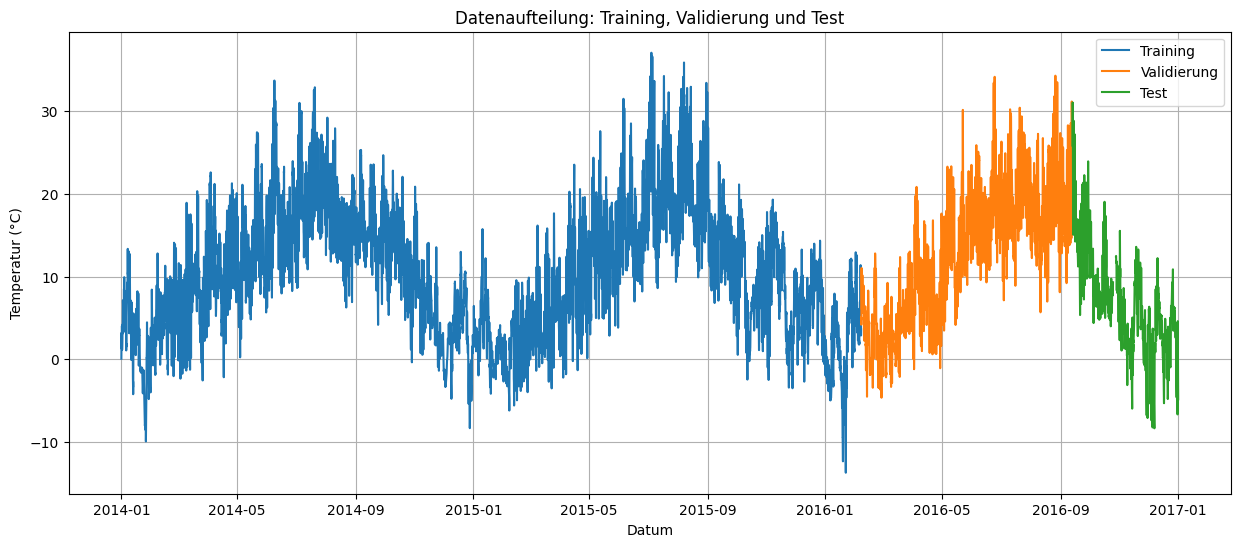

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.plot(trainingsDatensatz.index, trainingsDatensatz['T (degC)'], label='Training')
plt.plot(validierungsDatensatz.index, validierungsDatensatz['T (degC)'], label='Validierung')
plt.plot(testDatensatz.index, testDatensatz['T (degC)'], label='Test')

plt.title("Datenaufteilung: Training, Validierung und Test")
plt.xlabel("Datum")
plt.ylabel("Temperatur (°C)")
plt.legend() 
plt.grid(True)
plt.show()

Normalisieren

In [49]:
trainingsDatensatzDurchschnitt = trainingsDatensatz.mean()
trainingsDatensatzStandardabweichung = trainingsDatensatz.std()

trainingsDatensatz = (trainingsDatensatz - trainingsDatensatzDurchschnitt) / trainingsDatensatzStandardabweichung
validierungsDatensatz = (validierungsDatensatz - trainingsDatensatzDurchschnitt) / trainingsDatensatzStandardabweichung
testDatensatz = (testDatensatz - trainingsDatensatzDurchschnitt) / trainingsDatensatzStandardabweichung

trainingsDatensatz = trainingsDatensatz.fillna(0)
validierungsDatensatz = validierungsDatensatz.fillna(0)
testDatensatz = testDatensatz.fillna(0)

print("Neuer Durchschnitt (Training):")
print(trainingsDatensatz['T (degC)'].mean())

display(trainingsDatensatz)

Neuer Durchschnitt (Training):
-4.939416182984458e-17


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
Date Time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,-0.298860,-1.319497,-1.285184,-1.675469,-0.241237,-1.021940,-1.327299,-0.481933,-1.320166,-1.321768,...,0.018078,0.018544,0.199870,-0.120185,-0.278845,-0.606696,-0.609807,-0.599247,-1.398553,0.044275
2014-01-01 01:00:00,-0.357913,-1.203010,-1.164645,-1.696767,-0.558267,-0.968561,-1.337376,-0.389845,-1.327965,-1.331636,...,0.021125,0.023026,0.157681,-0.120185,-0.278845,-0.606696,-0.609807,-0.599247,-1.363726,0.039932
2014-01-01 02:00:00,-0.398355,-1.142743,-1.101577,-1.696767,-0.691710,-0.939220,-1.336970,-0.345307,-1.328604,-1.330834,...,0.017700,0.014941,0.212861,-0.120185,-0.278845,-0.606696,-0.609807,-0.599247,-1.271648,0.038999
2014-01-01 03:00:00,-0.432606,-1.052016,-1.008805,-1.681435,-0.858006,-0.894665,-1.330062,-0.282352,-1.321572,-1.323614,...,0.011082,0.010905,0.293886,-0.120185,-0.278845,-0.606696,-0.609807,-0.599247,-1.184900,0.038104
2014-01-01 04:00:00,-0.422702,-0.967599,-0.925503,-1.719069,-1.090617,-0.850328,-1.348348,-0.198970,-1.339472,-1.342065,...,0.003547,-0.001151,0.725084,-0.120185,-0.278845,-0.606696,-0.609807,-0.599247,-1.083231,0.036872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-07 00:00:00,-0.964538,-0.741978,-0.655581,-0.634653,0.429643,-0.723618,-0.698995,-0.539531,-0.683585,-0.683823,...,0.006616,0.004768,0.241499,-0.120185,-0.278845,-0.606696,-0.609807,-0.599247,-0.836626,0.059035
2016-02-07 01:00:00,-1.052436,-0.758514,-0.664406,-0.665596,0.408283,-0.733181,-0.721345,-0.535512,-0.705320,-0.705082,...,0.009630,0.007933,0.078752,-0.120185,-0.278845,-0.606696,-0.609807,-0.599247,-0.874778,0.057170
2016-02-07 02:00:00,-1.126098,-0.952151,-0.851027,-0.784910,0.685952,-0.841851,-0.805866,-0.632959,-0.789064,-0.789719,...,0.013261,0.013750,-0.012051,-0.120185,-0.278845,-0.606696,-0.609807,-0.599247,-0.910799,0.070900


Windowing

In [50]:
import numpy as np 
from tensorflow.keras.utils import timeseries_dataset_from_array

FENSTER_GROESSE = 24
VORHERSAGE_GROESSE = 1
BATCH_GROESSE = 32

zielSpaltenIndex = list(trainingsDatensatz.columns).index('T (degC)')

def erstelleDatensatz(daten, zielIndex, fenster, batchSize, zufaelligkeit):
    eingabewerte = daten.to_numpy()[:-fenster]
    zielwerte = daten.iloc[fenster:, zielIndex].to_numpy()
    
    datensatz = timeseries_dataset_from_array(
        data = eingabewerte,
        targets = zielwerte,
        sequence_length = fenster,
        batch_size = batchSize,
        shuffle = zufaelligkeit,
    )
    return datensatz

trainingsDatensatzFenster = erstelleDatensatz(trainingsDatensatz, zielSpaltenIndex, FENSTER_GROESSE, BATCH_GROESSE, True)
validierungsDatensatzFenster = erstelleDatensatz(validierungsDatensatz, zielSpaltenIndex, FENSTER_GROESSE, BATCH_GROESSE, False)
testDatensatzFenster = erstelleDatensatz(testDatensatz, zielSpaltenIndex, FENSTER_GROESSE, BATCH_GROESSE, False)



Aufgabe 3

In [51]:
import tensorflow as tf 
from tensorflow.keras import layers

modell = tf.keras.Sequential()

anzahlSpalten = trainingsDatensatz.shape[1]

# Schicht 1
modell.add(layers.LSTM(units = 32, input_shape = (FENSTER_GROESSE, anzahlSpalten)))

# Schicht 2
modell.add(layers.Dropout(0.2))

# Schicht 3
modell.add(layers.Dense(units = 1))

# Hyperparameter festlegen
modell.compile(
    loss = 'mae',       # mae = mean absolute error
    optimizer = 'adam',
    metrics = ['mae'],
)

modell.summary()

print("Training starten ...")

verlauf = modell.fit(
    trainingsDatensatzFenster,
    epochs = 10,
    validation_data = validierungsDatensatzFenster,
)



/Users/lucamartens/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 32)             │         6,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,945 (27.13 KB)

 Trainable params: 6,945 (27.13 KB)

 Non-trainable params: 0 (0.00 B)

Training starten ...
Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2536 - mae: 0.2536 - val_loss: 0.0844 - val_mae: 0.0844
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1152 - mae: 0.1152 - val_loss: 0.0672 - val_mae: 0.0672
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0999 - mae: 0.0999 - val_loss: 0.0693 - val_mae: 0.0693
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0946 - mae: 0.0946 - val_loss: 0.0644 - val_mae: 0.0644
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0920 - mae: 0.0920 - val_loss: 0.0564 - val_mae: 0.0564
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0895 - mae: 0.0895 - val_loss: 0.0572 - val_mae: 0.0572
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0902 - mae: 0.0902 - val_loss: 0.0580 - val_mae: 0.0580
Epoch 8/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0903 - mae: 0.0903 - val_loss: 0.0588 - val_mae: 0.0588
Epoch 9/10
574/574 ━━━━━━━━━━━━━━━━

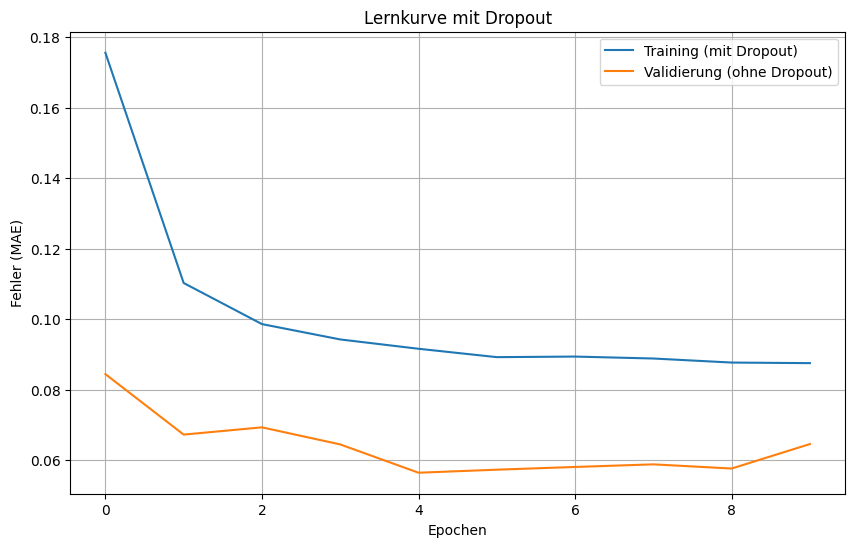

In [53]:
loss = verlauf.history['loss']
val_loss = verlauf.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training (mit Dropout)')
plt.plot(val_loss, label='Validierung (ohne Dropout)')
plt.title('Lernkurve mit Dropout')
plt.xlabel('Epochen')
plt.ylabel('Fehler (MAE)')
plt.legend()
plt.grid(True)
plt.show()

Aufgabe 4

In [54]:
testergebnis = modell.evaluate(testDatensatzFenster)

print(f"Test Loss (Fehler): {testergebnis[0]}")
print(f"Test MAE (Genauigkeit): {testergebnis[1]}")

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0503 - mae: 0.0503
Test Loss (Fehler): 0.05280642956495285
Test MAE (Genauigkeit): 0.05280642956495285


visualisieren

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


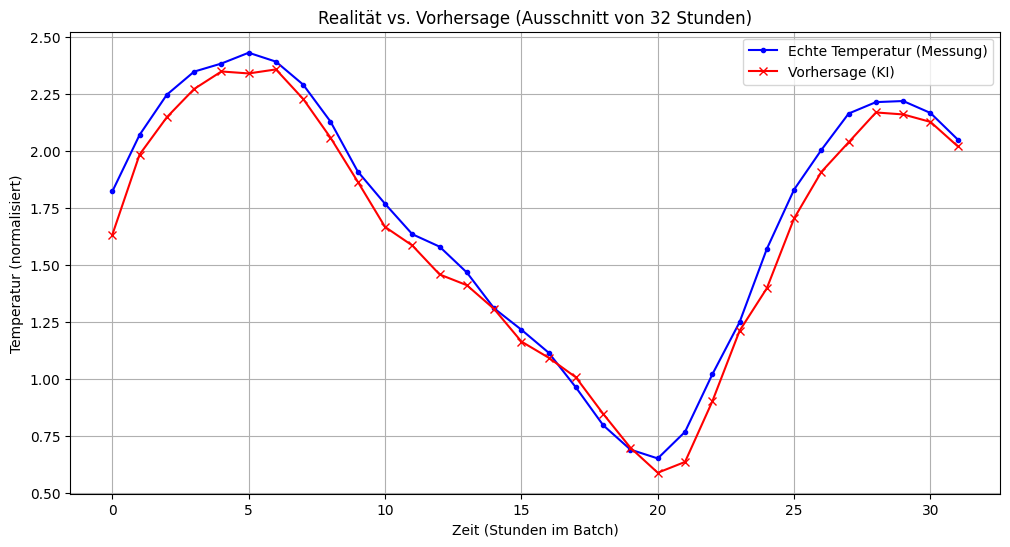

In [55]:
input_batch, echte_temperatur = next(iter(testDatensatzFenster))

vorhersage = modell.predict(input_batch)

plt.figure(figsize=(12, 6))

plt.plot(echte_temperatur, label = 'Echte Temperatur (Messung)', color = 'blue', marker = '.')

plt.plot(vorhersage, label = 'Vorhersage (KI)', color = 'red', marker = 'x')

plt.title('Realität vs. Vorhersage (Ausschnitt von 32 Stunden)')
plt.ylabel('Temperatur (normalisiert)')
plt.xlabel('Zeit (Stunden im Batch)')
plt.legend()
plt.grid(True)

plt.show()